# **Aplicação do k-nn na  base de dados de avaliações de carros.**

# Importação das bibliotecas

In [0]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
data_car = pd.read_csv('car.csv')

# Mostrar os cincos primeiros valores

In [16]:
data_car.head()

,compra,manutenção,portas,pessoas,lug_boot,segurança,classe
0,vhigh,med,2,4,small,high,acc
1,vhigh,med,2,4,med,high,acc
2,vhigh,med,2,4,big,med,acc
3,vhigh,med,2,4,big,high,acc
4,vhigh,med,2,more,med,high,acc


# Tratar os dados, remover **more e 5 more**
Utilizando um metódo da bibblioteca NUMPY colocando Nan no lugar.
 Com isso, podemos substituir por qualquer valor!!!!

 Esse metódo é utilizado para resolver problemas de inconsistência de dados.
  :)


Removendo a more da coluna pessoas e colocando 0 no lugar.

In [0]:
new_data_car = data_car

In [0]:
new_data_car = new_data_car.replace({"pessoas":{'2': np.NaN}})
new_data_car.fillna(2,inplace=True)

new_data_car = new_data_car.replace({"pessoas":{'4': np.NaN}})
new_data_car.fillna(4,inplace=True)

new_data_car = new_data_car.replace({"pessoas":{'more': np.NaN}})
new_data_car.fillna(0,inplace=True)

Removendo 5more da coluna portas e colocando 5 no lugar

In [0]:


new_data_car = new_data_car.replace({"portas":{'2': np.NaN}})
new_data_car.fillna(2,inplace=True)

new_data_car = new_data_car.replace({"portas":{'3': np.NaN}})
new_data_car.fillna(3,inplace=True)

new_data_car = new_data_car.replace({"portas":{'4': np.NaN}})
new_data_car.fillna(4,inplace=True)

new_data_car = new_data_car.replace({"portas":{'5more': np.NaN}})
new_data_car.fillna(5,inplace=True)


new_data_car.head(10)

Vamos fazer uma padronização dos dados, para aplicarmos o algoritmo K-NN.

* compra: vhigh = 1, high = 2, med = 3, low= 4.
* manutenção: vhigh= 1, high =2, med =3, low =4.
* portas: 2, 3, 4, 5more = 5.
* pessoas: 2, 4, more = 0.
* lug_boot: small=6, med=3, big=7.
* segurança: low=4, med=3, high=2.

In [0]:
new_data_car = new_data_car.replace({"compra":{'vhigh': np.NaN}})
new_data_car.fillna(1,inplace=True)

new_data_car = new_data_car.replace({"compra":{'high': np.NaN}})
new_data_car.fillna(2,inplace=True)

new_data_car = new_data_car.replace({"compra":{'med': np.NaN}})
new_data_car.fillna(3,inplace=True)

new_data_car = new_data_car.replace({"compra":{'low': np.NaN}})
new_data_car.fillna(4,inplace=True)


In [0]:
new_data_car = new_data_car.replace({"manutenção":{'vhigh': np.NaN}})
new_data_car.fillna(1,inplace=True)

new_data_car = new_data_car.replace({"manutenção":{'high': np.NaN}})
new_data_car.fillna(2,inplace=True)

new_data_car = new_data_car.replace({"manutenção":{'med': np.NaN}})
new_data_car.fillna(3,inplace=True)

new_data_car = new_data_car.replace({"manutenção":{'low': np.NaN}})
new_data_car.fillna(4,inplace=True)


In [0]:

new_data_car = new_data_car.replace({"lug_boot":{'small': np.NaN}})
new_data_car.fillna(6,inplace=True)

new_data_car = new_data_car.replace({"lug_boot":{'med': np.NaN}})
new_data_car.fillna(3,inplace=True)

new_data_car = new_data_car.replace({"lug_boot":{'big': np.NaN}})
new_data_car.fillna(7,inplace=True)


In [0]:
new_data_car = new_data_car.replace({"segurança":{'low': np.NaN}})
new_data_car.fillna(4,inplace=True)

new_data_car = new_data_car.replace({"segurança":{'med': np.NaN}})
new_data_car.fillna(3,inplace=True)

new_data_car = new_data_car.replace({"segurança":{'high': np.NaN}})
new_data_car.fillna(2,inplace=True)

Ápos mapear os dados será necessário, remover a linha 384, onde existe uma inconsistência.

In [0]:
new_data_car = new_data_car.drop(384)
new_data_car.head(388)

Caso desejar salvar os dados gerados de acordo com os parâmetro sugeridos.

In [0]:
new_data_car.head()
new_data_car.to_csv("new_data_car")

## Vamos para implementação do Classificador
Importação da biblioteca sklearn, que contém o algoritmo K-NN.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

 Selecione as "features" para classificação em um array NUMPY

In [0]:
x = np.array(new_data_car.drop('classe',1))

Selecionado as classes para classificação em um array numpy

In [0]:
y = np.array(new_data_car['classe'])


Criando classificador

In [0]:
knn = KNeighborsClassifier(n_neighbors=5)

Treinando o classificador

In [63]:
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Caso de teste

In [64]:
knn.predict([[2,0,4,4,1,3]])

array(['unacc'], dtype=object)

## Vamos visualizar os dados a partir da biblioteca SEABORN 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


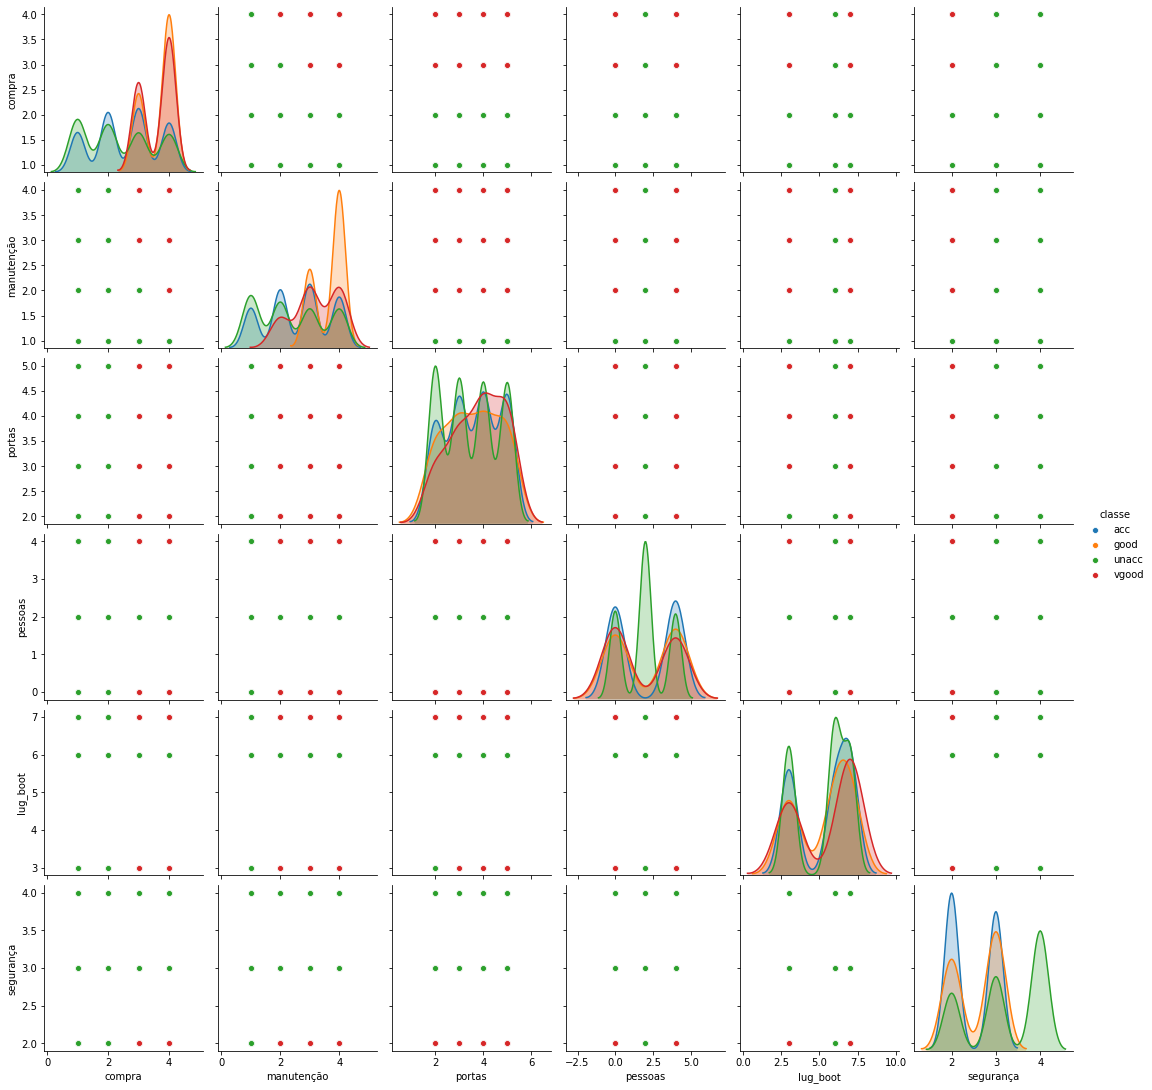

In [65]:
sb.pairplot(new_data_car, hue="classe")